<a href="https://colab.research.google.com/github/2303a51585/23CSBTB27-28/blob/main/Exam(Lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 First few rows of datasets
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

 Accuracy of the model is100.00%


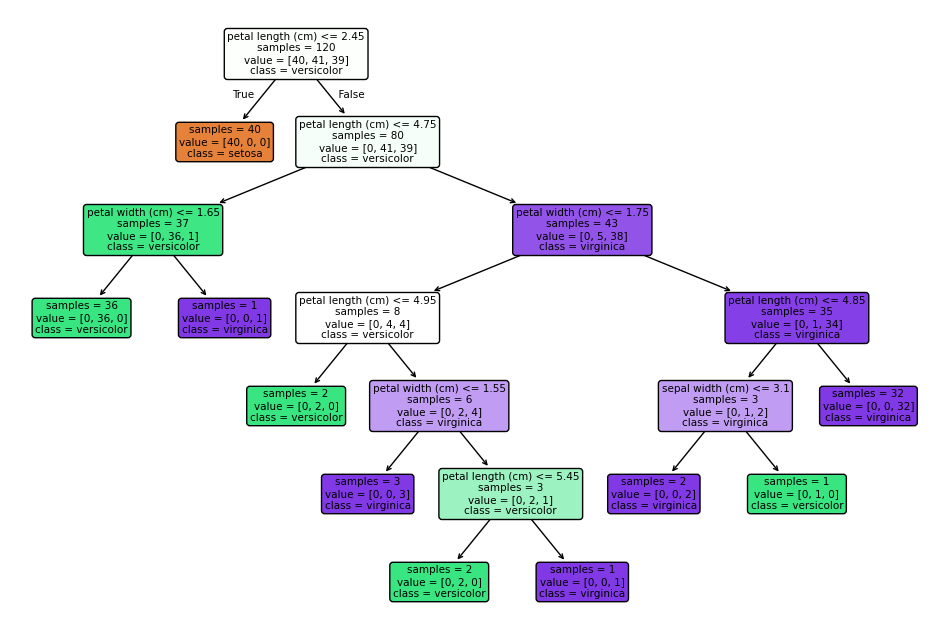


 Rules for classification
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import tree
data=load_iris()
X=data.data
y=data.target
df=pd.DataFrame(X,columns=data.feature_names)
df['target']=y
print("\n First few rows of datasets")
print(df.head())
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"\n Accuracy of the model is{accuracy*100:.2f}%")
plt.figure(figsize=(12,8))
tree.plot_tree(clf,filled=True,feature_names=data.feature_names,class_names=data.target_names,rounded=True,impurity=False)
plt.show()
class_rules=export_text(clf, feature_names=data.feature_names)
print("\n Rules for classification")
print(class_rules)